In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('final_dataset.csv')

In [3]:
y = dataset.Weekly_Sales
X = dataset.drop(['Date', 'Weekly_Sales'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=1)

In [6]:
dfs = [X_train, y_train, X_test, y_test, X_val, y_val]
names = ['X_train', 'y_train', 'X_test', 'y_test', 'X_val', 'y_val']
zipping = zip(names, dfs)
for i in zipping:
    print(i[0], ': ', i[1].shape)

X_train :  (320393, 22)
y_train :  (320393,)
X_test :  (84314, 22)
y_test :  (84314,)
X_val :  (16863, 22)
y_val :  (16863,)


**Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
X_train_s = StandardScaler().fit_transform(X_train)
X_test_s = StandardScaler().fit_transform(X_test)
X_val_s = StandardScaler().fit_transform(X_val)

**Dummy Regressor - Bad Model**

In [8]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(X_train, y_train)
dr.score(X_test, y_test)

-2.2330336468812106e-06

**Linear Reggresion**

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.08954232454027877

**Ridge Regression - L1**

In [161]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1).fit(X_train, y_train)
ridge.score(X_test, y_test)

0.08954229757198096

**Lasso Regression - L2**

In [162]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1).fit(X_train, y_train)
lasso.score(X_test, y_test)

/Users/henriquesantana/anaconda3/envs/datascience/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 625539514247.1719, tolerance: 16576785544.033773
  positive)


0.08953498077475419

In [ ]:
# from sklearn.svm import SVR
# svr = SVR()
# svr.fit(X_train_s, y_train)
# svr.score(X_test_s, y_test)

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# knr = KNeighborsRegressor()
# knr.fit(X_train_s, y_train)
# knr.score(X_test_s, y_test)

**Decision Tree**

In [10]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.9453481835142601

**Random Forest**

In [11]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(
    random_state=42, 
    n_estimators=100
)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.9763107443186506

"Almost 98 percent of the variance in the response variable can be explained by the explanatory variables. The remaining 2 percent can be attributed to unknown, lurking variables or inherent variability."

In [12]:
X_val.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Size,Year,Month,A,B,C,ChristmasCountDown,ThanksgivingCountDown,LaborDayCountDown,SuperBowlCountDown
113154,12,85,0,93.29,3.805,0.00,0.00,0.00,0.0,0.00,...,112238,2011,7,0,1,0,154,119,42,196
17576,2,34,0,51.70,3.268,6552.26,4355.69,105.97,1703.1,3376.03,...,202307,2012,1,1,0,0,343,308,231,21
86683,9,38,0,86.41,3.407,1042.73,8.00,1.66,1129.2,2929.43,...,125833,2012,7,0,1,0,154,119,42,196
27045,3,91,0,58.06,3.290,774.55,349.99,0.00,4.0,328.72,...,37392,2012,1,0,1,0,336,301,224,14
342699,36,46,0,64.55,3.282,0.00,0.00,0.00,0.0,0.00,...,39910,2011,3,1,0,0,301,266,189,343


In [40]:
validation = list(zip(y_val.head(20).index, y_val.head(20).values))

In [45]:
for i in validation:
    print('predicted: ', rfr.predict([X_val.loc[i[0]]]), 'actual: ', i[1])

predicted:  [2522.0911] actual:  2147.97
predicted:  [12147.5967] actual:  11203.41
predicted:  [70611.1239] actual:  69044.18
predicted:  [189.7852] actual:  167.72
predicted:  [2593.2076] actual:  2692.53
predicted:  [2443.5993] actual:  2455.21
predicted:  [77779.0108] actual:  90366.66
predicted:  [17191.3915] actual:  15570.39
predicted:  [13688.0056] actual:  12941.88
predicted:  [907.1846] actual:  1000.5
predicted:  [1926.873] actual:  1847.38
predicted:  [5522.2697] actual:  4510.69
predicted:  [2570.994] actual:  2873.99
predicted:  [17191.0964] actual:  20149.32
predicted:  [1581.155] actual:  2001.38
predicted:  [1528.1665] actual:  1870.26
predicted:  [3983.672] actual:  3977.33
predicted:  [80298.461] actual:  77712.67
predicted:  [17305.425] actual:  17253.28
predicted:  [18113.5863] actual:  16408.95


## Appendix

What else could have been done?

### PCA

To find the optimal componentes and them apply fit_transform

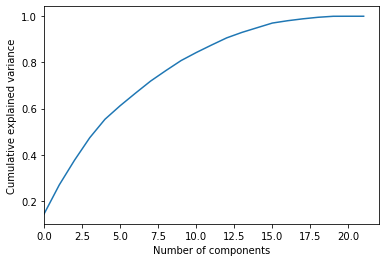

In [25]:
X_Train=X_train.values
X_Train=pd.np.asarray(X_Train)

from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X_Train)

from sklearn.decomposition import PCA
pca = PCA().fit(X_std)

import matplotlib.pyplot as plt
plt.plot(pd.np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,22,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Could use 15 components that explains more than 80% of variance

### Using last weekly sales

In [26]:
dataset['Weekly_Sales_t_1'] = dataset['Weekly_Sales'].shift(1)
dataset['Weekly_Sales_t_2'] = dataset['Weekly_Sales'].shift(2)
dataset['Weekly_Sales_t_3'] = dataset['Weekly_Sales'].shift(3)

In [27]:
dataset[['Weekly_Sales', 'Weekly_Sales_t_1', 'Weekly_Sales_t_2', 'Weekly_Sales_t_3']].head(10)

,Weekly_Sales,Weekly_Sales_t_1,Weekly_Sales_t_2,Weekly_Sales_t_3
0,24924.50,NaN,NaN,NaN
1,50605.27,24924.50,NaN,NaN
2,13740.12,50605.27,24924.50,NaN
3,39954.04,13740.12,50605.27,24924.50
4,32229.38,39954.04,13740.12,50605.27
5,5749.03,32229.38,39954.04,13740.12
6,21084.08,5749.03,32229.38,39954.04
7,40129.01,21084.08,5749.03,32229.38
8,16930.99,40129.01,21084.08,5749.03
9,30721.50,16930.99,40129.01,21084.08


### Prediction Interval

In [84]:
y_pred = rfr.predict(X_test)

In [140]:
low_coef = 0.75
high_coef = 1 + (1 - low_coef)
idx = 52090
x_in = pd.np.array(X_test)[idx]
y_out = pd.np.array(y_test)[idx]
y_pred_out = y_pred[idx]

In [141]:
#print('Prediction Interval: %.3f' % interval)
lower, upper = y_pred_out * low_coef, y_pred_out * high_coef
print('Predicted value: %.3f' % y_pred_out)
print('The true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % y_out)

Predicted value: 9984.400
The true value is between 7488.300 and 12480.500
True value: 9221.890


**Note**: I didn't calculated the intervals, I set it to 0.75 to 1.25. I could have used std deviation or quantiles in the sklearn

### Grid Search

In [142]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [153]:
# def rfr_model(X, y):
#     gsc = GridSearchCV(
#         estimator=RandomForestRegressor(),
#         param_grid={
#             'n_estimators': (10, 50, 100, 1000),
#         },
#         cv=5, 
#         scoring='r2', 
#         verbose=0,      
#         n_jobs=-1
#     )
    
#     grid_result = gsc.fit(X, y)
#     best_params = grid_result.best_params_
     
#     rfr2 = RandomForestRegressor(max_depth=best_params["max_depth"], 
#                                  n_estimators=best_params["n_estimators"], 
#                                  random_state=42, 
#                                  verbose=False)
#     scores = cross_val_score(rfr2, X, y, cv=10, scoring='r2')

#     return scores

In [155]:
# scores = rfr_model(X_train, y_train)

In [164]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  8.7min finished


Best Score:  0.09239704276178444
Best Params:  {'alpha': 0.001}


/Users/henriquesantana/anaconda3/envs/datascience/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73903042326428.19, tolerance: 16576785544.033773
  positive)


In [166]:
lasso = Lasso(alpha=0.001).fit(X_train, y_train)
lasso.score(X_test, y_test)

/Users/henriquesantana/anaconda3/envs/datascience/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73903042326428.19, tolerance: 16576785544.033773
  positive)


0.08954230693255072

previous: 0.08953498077475419

Not that much improvement

### XGBoost

In [169]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42)
xgr.fit(X_train, y_train)
xgr.score(X_test, y_test)

/Users/henriquesantana/anaconda3/envs/datascience/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:43:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7443996148251232

Not a good performance (r2), but could improve tuning hyperparameters and using previous explained approachs.